In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from environment import Environment
from agents.mdp_escaper import MDPEscaper
from agents.vi_escaper import VIEscaper, MaskedVIEscaper
from agents.pursuer import Pursuer

VI converged on iteration: 51


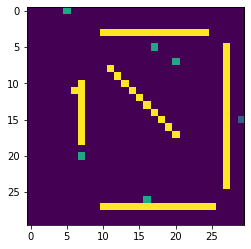

In [12]:
env = Environment()

e_start_state = np.array([11, 6])
end_state = np.array([15, 29])

# escaper = MaskedVIEscaper(e_start_state, end_state, env, 1.0)
# escaper = VIEscaper(e_start_state, end_state, env)
escaper = MDPEscaper(e_start_state, end_state, env, 20)

agents = [escaper]

p_start_states = [np.array([7, 20]),
                  np.array([5, 17]),
                  np.array([0, 5]),
                  np.array([20, 7]),
                  np.array([26, 16])]

for p_ss in p_start_states:
    agents.append(Pursuer(p_ss, env))

env.run(agents, end_state, 0)
# 13

In [13]:
# plt.imshow(escaper._vi())

In [14]:
# plt.imshow(escaper._get_P())

In [15]:
# plt.imshow(np.clip(escaper._get_G_p(), a_min=None, a_max=escaper._G_final.max() + 1))

In [16]:
# plt.imshow(escaper._get_R_path())

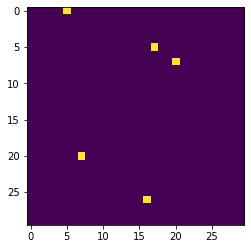

In [17]:
# plt.imshow(np.clip(escaper._get_R_p(), a_min=-1, a_max=None))
plt.imshow(escaper._get_R_p())

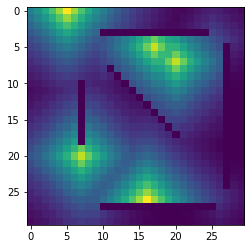

In [18]:
plt.imshow(escaper._bellman(escaper._get_R_p()))

In [19]:
U_p = escaper._bellman(escaper._get_R_p())

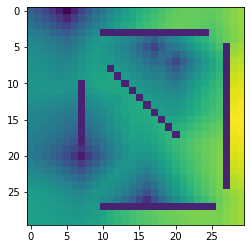

In [20]:
total = -U_p * 0.03 + escaper._R_path
total[escaper._R_path == -1] = (-U_p * 0.02).min()
# U_p[escaper._R_path == -1] = 

plt.imshow(total)

In [123]:
# u_p, has_best = escaper._get_best_action(escaper.get_state(), escaper._bellman(escaper._get_R_p()), return_action=True)

In [124]:
# has_best

In [125]:
# escaper._get_best_action(escaper.get_state(), escaper._R_path, return_action=True)

In [126]:
# draw_V_init = np.copy(mdp_escaper._bellman())

# draw_V_init[mdp_escaper.get_state()[0], mdp_escaper.get_state()[1]] = 0.0

# plt.imshow(np.clip(draw_V_init, a_min=-1, a_max=50))

In [46]:
from scipy.ndimage.filters import gaussian_filter

R_pursuer = np.zeros_like(mdp_escaper._R_path)

R_pursuer[pursuer.get_state()[0], pursuer.get_state()[1]] = 1
R_pursuer = gaussian_filter(R_pursuer, sigma=1)
R_pursuer = R_pursuer / R_pursuer.max() * -500

<AxesSubplot:>

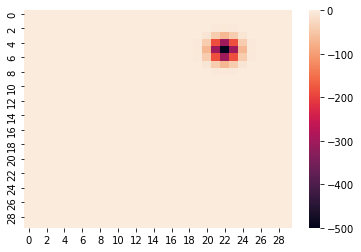

In [38]:
import seaborn as sns

sns.heatmap(R_pursuer)

In [16]:
draw_V_init = np.copy(escaper._V_init)

draw_V_init[mdpe_start_state[0], mdpe_start_state[1]] = 0.0

plt.imshow(draw_V_init)

NameError: name 'escaper' is not defined

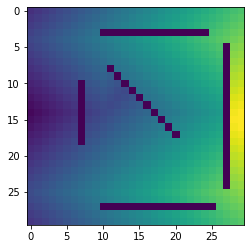

In [15]:
plt.imshow(escaper._bellman())
    

In [16]:
escaper._V_init.min()

-1.0